In [1]:
import pandas as pd

In [5]:
from sklearn.datasets import load_boston

In [41]:
housing = load_boston()

In [42]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
print(housing["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
pd.DataFrame(data = housing["data"], columns=housing["feature_names"])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
X= housing["data"]
y = housing["target"]

## train test split 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Ridge model

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge = Ridge(alpha = 1.0)

In [21]:
ridge.fit(X_train,y_train)

Ridge()

In [22]:
y_pred = ridge.predict(X_test)

## score

In [25]:
print( "training score: ", ridge.score(X_train,y_train))
print( "test score: ", ridge.score(X_test,y_test))

training score:  0.7370184501738224
test score:  0.7204049996720365


In [26]:
## Different alphas 

In [49]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10,100, 1000]
score_train = []
score_test = []

for i in alphas:
    ridge = Ridge(alpha= i)
    ridge.fit(X_train,y_train)
    score_train.append (ridge.score(X_train,y_train))
    score_test.append (ridge.score(X_test,y_test))

In [45]:
import seaborn as sns

<AxesSubplot:>

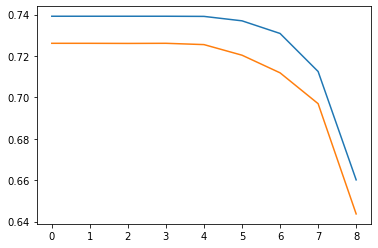

In [46]:
sns.lineplot(x= range(len(alphas)), y= score_train)
sns.lineplot(x= range(len(alphas)), y= score_test)

### Lasso 

In [47]:
from sklearn.linear_model import Lasso

<AxesSubplot:>

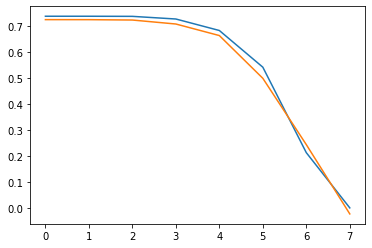

In [50]:
score_train = []
score_test = []

for i in alphas:
    lasso = Lasso(alpha= i)
    lasso.fit(X_train,y_train)
    score_train.append (lasso.score(X_train,y_train))
    score_test.append (lasso.score(X_test,y_test))
    
sns.lineplot(x= range(len(alphas)), y= score_train)
sns.lineplot(x= range(len(alphas)), y= score_test)